In [17]:
'''
PARÂMETROS PASSADOS
S=68
I=2
R=0
h=0.1
N_b=12
T_b=24 #!(cenarios 0 e 2)
T_b=48 #!(cenario 1)
S_b=10
I_b=50
m_k=6
n_k=22
T_k=24 #!(cenarios 0 e 1)
T_k=12 #!(cenario 2)
periodo=21

PARÂMETROS PADRÃO
t=0
mortes=0
periodo *= 24
'''

'\nPARÂMETROS PASSADOS\nS=68\nI=2\nR=0\nh=0.1\nN_b=12\nT_b=24 #!(cenarios 0 e 2)\nT_b=48 #!(cenario 1)\nS_b=10\nI_b=50\nm_k=6\nn_k=22\nT_k=24 #!(cenarios 0 e 1)\nT_k=12 #!(cenario 2)\nperiodo=21\n\nPARÂMETROS PADRÃO\nt=0\nmortes=0\nperiodo *= 24\n'

In [18]:
import pandas as pd

In [19]:
TX_MORTE = 0.02

class Cenario ():
    def __init__(self, S, I, R, h, N_b, T_b, S_b, I_b, m_k, n_k, T_k, periodo):
        self.S = S
        self.I = I
        self.R = R
        self.h = h
        self.N_b = N_b
        self.T_b = T_b #! maior no cenário 1
        self.S_b = S_b
        self.I_b = I_b
        self.m_k = m_k
        self.n_k = n_k
        self.T_k = T_k #! menor no cenário 2
        self.periodo = periodo
        # Configurações padrão:
        self.t = 0
        self.mortes = 0
        self.periodo *= 24

    # métodos
    def calcular_b_k(self):
        self.b = self.N_b/(self.T_b*self.S_b*self.I_b)
        self.k = self.m_k/(self.n_k*self.T_k)

    def calcular_sir(self):
        So = self.S
        Io = self.I
        Ro = self.R
        to = self.t

        self.S = So - self.h*self.b*So*Io
        self.I = Io + self.h*(self.b*So*Io - self.k*Io)
        self.R = Ro + self.h*self.k*Io
        self.t = to + self.h

        self.mortes = self.R*TX_MORTE

In [20]:
#cenario = Cenario(S,  I, R, h,   N_b, T_b, S_b, I_b, m_k, n_k, T_k, periodo)
cenario0 = Cenario(68, 2, 0, 0.1, 12,  24,  10,  50,  6,   22,  24,  21)
cenario1 = Cenario(68, 2, 0, 0.1, 12,  48,  10,  50,  6,   22,  24,  21)
cenario2 = Cenario(68, 2, 0, 0.1, 12,  24,  10,  50,  6,   22,  12,  21)

In [21]:
cenario0.calcular_b_k()
data_c0 = {"S": [], "I": [], "R": [], "mortes": [], "t": []}
while cenario0.t <= cenario0.periodo:
    cenario0.calcular_sir()
    data_c0["S"].append(cenario0.S)
    data_c0["I"].append(cenario0.I)
    data_c0["R"].append(cenario0.R)
    data_c0["mortes"].append(cenario0.mortes)
    data_c0["t"].append(cenario0.t)
df_c0 = pd.DataFrame(data_c0)

In [22]:
cenario1.calcular_b_k()
data_c1 = {"S": [], "I": [], "R": [], "mortes": [], "t": []}
while cenario1.t < cenario1.periodo:
    cenario1.calcular_sir()
    data_c1["S"].append(cenario1.S)
    data_c1["I"].append(cenario1.I)
    data_c1["R"].append(cenario1.R)
    data_c1["mortes"].append(cenario1.mortes)
    data_c1["t"].append(cenario1.t)
df_c1 = pd.DataFrame(data_c1)

In [23]:
cenario2.calcular_b_k()
data_c2 = {"S": [], "I": [], "R": [], "mortes": [], "t": []}
while cenario2.t < cenario2.periodo:
    cenario2.calcular_sir()
    data_c2["S"].append(cenario2.S)
    data_c2["I"].append(cenario2.I)
    data_c2["R"].append(cenario2.R)
    data_c2["mortes"].append(cenario2.mortes)
    data_c2["t"].append(cenario2.t)
df_c2 = pd.DataFrame(data_c2)

<Axes: title={'center': 'Cenário 2: Melhoria nos protocolos de atendimento'}, xlabel='t'>

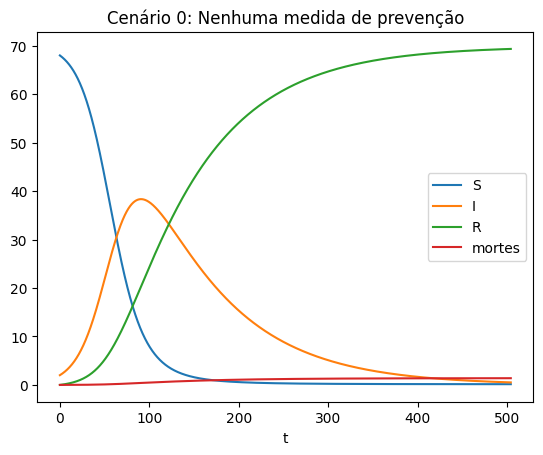

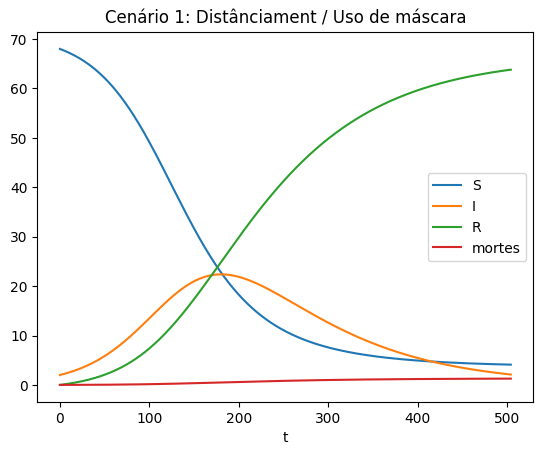

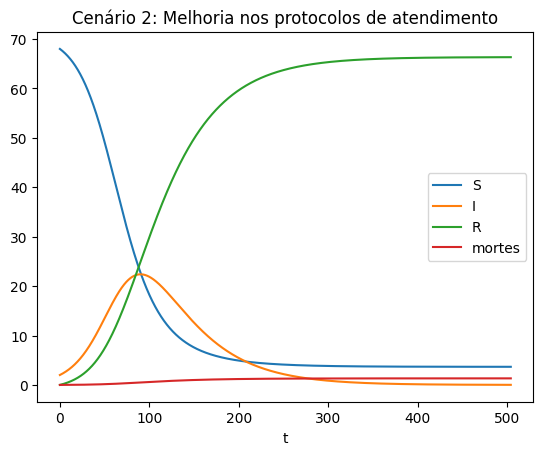

In [24]:
df_c0.plot(x="t", y=["S", "I", "R", "mortes"], title="Cenário 0: Nenhuma medida de prevenção")
df_c1.plot(x="t", y=["S", "I", "R", "mortes"], title="Cenário 1: Distânciament / Uso de máscara")
df_c2.plot(x="t", y=["S", "I", "R", "mortes"], title="Cenário 2: Melhoria nos protocolos de atendimento")